In [2]:
#import fitting_tools as ft
import time
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [4]:

#Calculate the mean and std of frac pulls
def calc_mean_std_of_pulls(values):
    pulls=(values[0]-values[1])/values[2]
    return (np.mean(pulls),np.std(pulls))

In [8]:
infile_name='frac_values_default_sig200_bkg1000_MCsig1000_MCbkg1000_bs0_nn5.dat'
values=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values)

infile_name='frac_values_default_sig200_bkg1000_MCsig10000_MCbkg10000_bs0_nn5.dat'
values2=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values2)

infile_name='frac_values_default_sig200_bkg1000_MCsig50000_MCbkg50000_bs0_nn5.dat'
values3=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values3)

infile_name='frac_values_default_sig200_bkg1000_MCsig1000_MCbkg1000_bs0_nn10.dat'
values4=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values4)

infile_name='frac_values_default_sig200_bkg1000_MCsig10000_MCbkg10000_bs0_nn10.dat'
values5=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values5)

infile_name='frac_values_default_sig200_bkg1000_MCsig50000_MCbkg50000_bs0_nn10.dat'
values6=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values6)

infile_name='frac_values_default_sig200_bkg1000_MCsig1000_MCbkg1000_bs0_nn3.dat'
values7=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values7)


infile_name='frac_values_default_sig200_bkg1000_MCsig1000_MCbkg1000_bs100_nn5.dat'
values8=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values8)

infile_name='frac_values_default_sig200_bkg1000_MCsig1000_MCbkg1000_bs100_nn3.dat'
values9=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values9)

(-0.72338505811054532, 1.0452861556998718)
(-0.01114678413791536, 1.019991674317241)
(0.1656942967079047, 1.0004145734836447)
(-1.4579168936403453, 0.97317552972715249)
(-0.14785316544593285, 1.0176476867698769)
(0.050846954040973578, 1.0129685682342415)
(-0.25903639680757817, 1.0493443914789364)
(-0.55271973379472839, 0.9945788939618172)
(-0.034299124377676023, 1.0086195073200162)


In [9]:
infile_name='frac_values_trial2_sig200_bkg1000_MCsig1000_MCbkg1000_bs0_nn5.dat'
values2=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values)

infile_name='frac_values_trial2_sig200_bkg1000_MCsig10000_MCbkg10000_bs0_nn5.dat'
values22=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values2)

infile_name='frac_values_trial2_sig200_bkg1000_MCsig50000_MCbkg50000_bs0_nn5.dat'
values23=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values3)

infile_name='frac_values_trial2_sig200_bkg1000_MCsig1000_MCbkg1000_bs0_nn10.dat'
values24=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values4)

infile_name='frac_values_trial2_sig200_bkg1000_MCsig10000_MCbkg10000_bs0_nn10.dat'
values25=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values5)

infile_name='frac_values_trial2_sig200_bkg1000_MCsig50000_MCbkg50000_bs0_nn10.dat'
values26=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values6)

infile_name='frac_values_trial2_sig200_bkg1000_MCsig1000_MCbkg1000_bs0_nn3.dat'
values27=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values7)


infile_name='frac_values_trial2_sig200_bkg1000_MCsig1000_MCbkg1000_bs100_nn5.dat'
values28=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values8)

infile_name='frac_values_trial2_sig200_bkg1000_MCsig1000_MCbkg1000_bs100_nn3.dat'
values29=np.loadtxt(infile_name, delimiter=' ', unpack=True,dtype=float)
print calc_mean_std_of_pulls(values9)

(-0.72338505811054532, 1.0452861556998718)
(-0.66810494675810328, 1.0345647368192767)
(0.1656942967079047, 1.0004145734836447)
(-1.4579168936403453, 0.97317552972715249)
(-0.14785316544593285, 1.0176476867698769)
(0.050846954040973578, 1.0129685682342415)
(-0.25903639680757817, 1.0493443914789364)
(-0.55271973379472839, 0.9945788939618172)
(-0.034299124377676023, 1.0086195073200162)


<IPython.core.display.Javascript object>


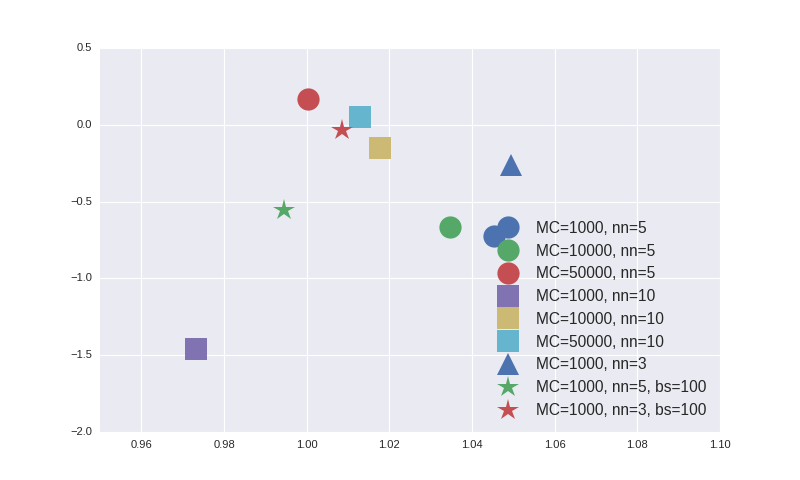

In [10]:
plt.figure(figsize=(10,6))

labels = ['MC=1000, nn=5',
          'MC=10000, nn=5',
          'MC=50000, nn=5',
          'MC=1000, nn=10',
          'MC=10000, nn=10',
          'MC=50000, nn=10',
          'MC=1000, nn=3',
          'MC=1000, nn=5, bs=100',
          'MC=1000, nn=3, bs=100'
         ]

fmt = ['o','o','o','s','s','s','^','*','*']

for v,l,f in zip([values,values2,values3,values4,values5,values6,values7,values8,values9],labels,fmt):
    x,y = calc_mean_std_of_pulls(v) 
    plt.plot(y,x,f,label=l,markersize=20)

plt.ylim(-2.0,0.5)
plt.xlim(0.95,1.10)
plt.legend(loc='lower right',fontsize=14)

<IPython.core.display.Javascript object>


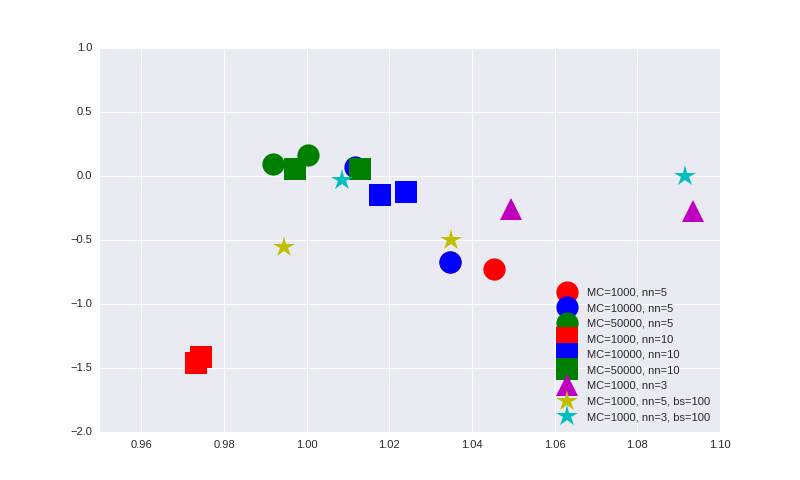

In [20]:
plt.figure(figsize=(10,6))

labels = ['MC=1000, nn=5',
          'MC=10000, nn=5',
          'MC=50000, nn=5',
          'MC=1000, nn=10',
          'MC=10000, nn=10',
          'MC=50000, nn=10',
          'MC=1000, nn=3',
          'MC=1000, nn=5, bs=100',
          'MC=1000, nn=3, bs=100'
         ]

fmt = ['ro','bo','go','rs','bs','gs','m^','y*','c*']

for v,l,f in zip([values2,values22,values23,values24,values25,values26,values27,values28,values29],labels,fmt):
    x,y = calc_mean_std_of_pulls(v) 
    plt.plot(y,x,f,label=l,markersize=20)
    
for v,f in zip([values,values2,values3,values4,values5,values6,values7,values8,values9],fmt):
    x,y = calc_mean_std_of_pulls(v) 
    plt.plot(y,x,f,markersize=20)

plt.ylim(-2.0,1.0)
plt.xlim(0.95,1.10)
plt.legend(loc='lower right',fontsize=10)